In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("source/House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [68]:
data.shape

(4746, 12)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [70]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [71]:
data.describe(include = object)

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [72]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [3]:
corr_matrix = data.select_dtypes(exclude = object).corr(method=lambda x, y: pearsonr(x, y)[0])
pval_matrix = data.select_dtypes(exclude = object).corr(method=lambda x, y: pearsonr(x, y)[1])

In [74]:
corr_matrix

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [75]:
pval_matrix

,BHK,Rent,Size,Bathroom
BHK,1.000000e+00,1.206942e-153,0.000000e+00,0.000000e+00
Rent,1.206942e-153,1.000000e+00,1.690873e-195,2.441917e-225
Size,0.000000e+00,1.690873e-195,1.000000e+00,0.000000e+00
Bathroom,0.000000e+00,2.441917e-225,0.000000e+00,1.000000e+00


Нулевая гипотеза (переменные не коррелируют) отвергается для всех пар (кроме дисперсий), т.к. p-value для них < 0.05

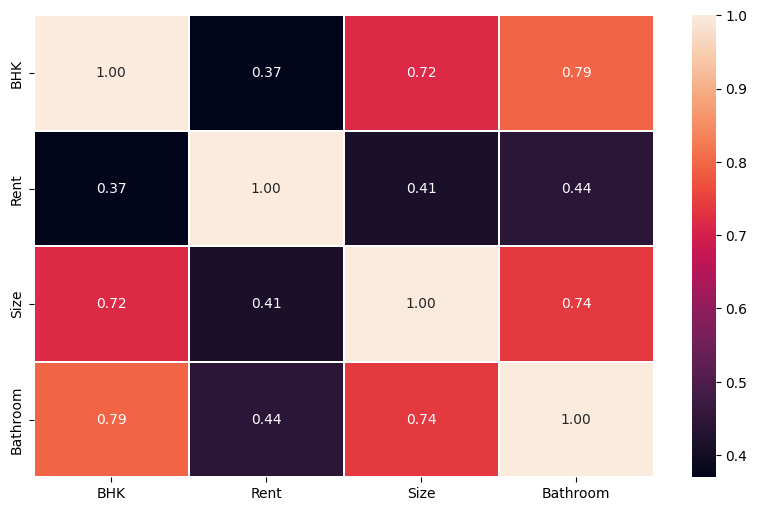

In [76]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

<Figure size 1000x600 with 0 Axes>

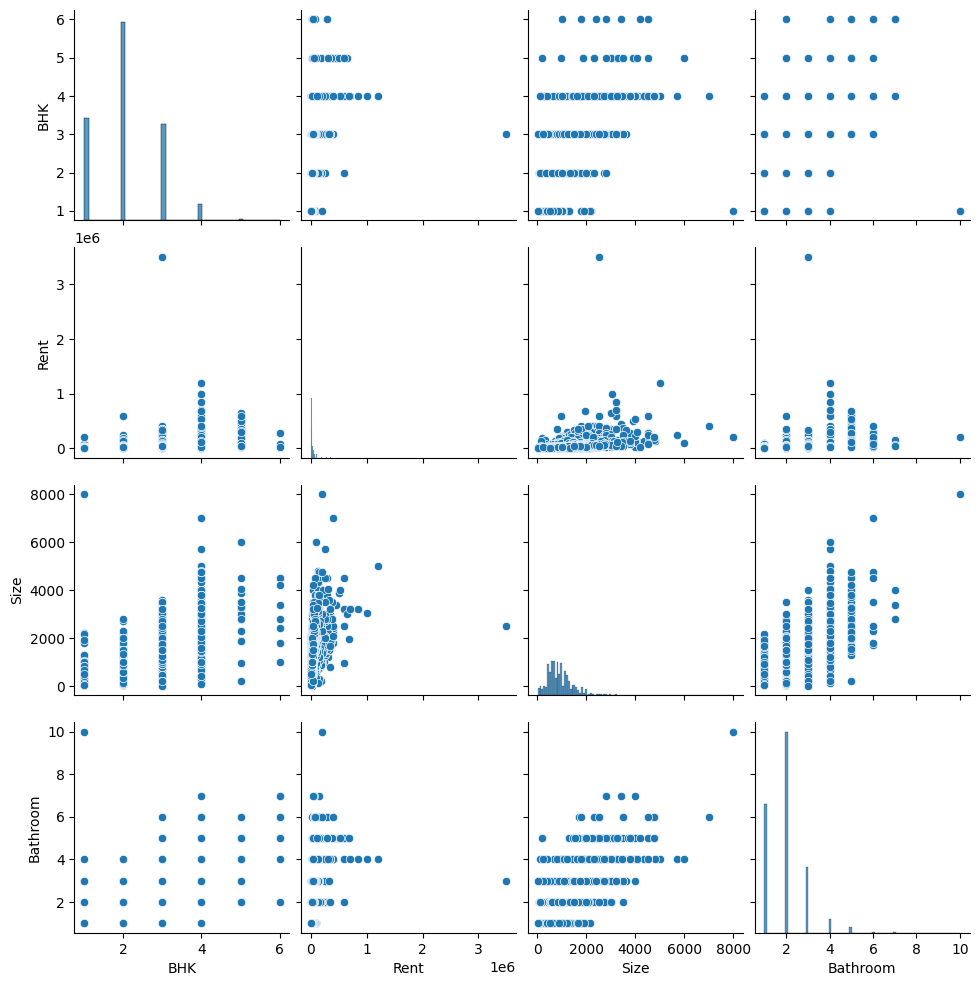

In [77]:
plt.figure(figsize = (10,6))
sns.pairplot(data)
plt.show()

In [4]:
data = data.drop(['Posted On','Area Locality','Floor'],axis=1)
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
data = pd.get_dummies(data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [6]:
X = data.drop('Rent',axis=1)
y = data['Rent']
features1 = X.columns.tolist()
predicted = y.name

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Scaling the data
y_train_1 = y_train.values.reshape(-1, 1)
y_test_1 = y_test.values.reshape(-1, 1)

sc_X = StandardScaler()
sc_y = MinMaxScaler()
X_train_1 = sc_X.fit_transform(X_train)
X_test_1 = sc_X.fit_transform(X_test)
y_train_1 = sc_y.fit_transform(y_train_1)
y_test_1 = sc_y.fit_transform(y_test_1)

In [9]:
def get_model(X, y):
    # Добавляем константу к X_train и X_test
    X_const = sm.add_constant(X)

    # Строим модель линейной регрессии
    sm_model = sm.OLS(y, X_const)
    results = sm_model.fit()
    pred = results.predict()
    return results, pred

In [10]:
def get_model_results(model, features, predicted):
    # Выводим результаты
    print("Результаты модели линейной регрессии:")
    print(model.summary(yname=predicted, xname=["Constant"]+features))

In [11]:
def get_significant_coefficients(model, feature):
    # Посмотрим на значения P-значений
    p_values = model.pvalues

    # Установим порог статистической значимости
    threshold = 0.05
    # Получение индексов значимых переменных
    significant_variable_indices = np.where(p_values < threshold)[0]
    feature_names = ["Constant"] + features1
    # Получение названий переменных по индексам
    significant_variable_names = np.array(feature_names)[significant_variable_indices]

    # Вывод значимых переменных
    print("Значимые переменные:")
    print(significant_variable_names)

In [12]:
def get_regression_equation(model, feature_names):
    coefficients = model.params
    intercept = model.params[0]  # Intercept будет в первом элементе

    # Формирование уравнения линейной регрессии
    equation = f"{intercept:.4f}"
    for i, coef in enumerate(coefficients[1:]):  # Начинаем с 1, так как 0 - это intercept
        equation += f" + {coef:.4f} * {feature_names[i]}"
    print("Уравнение линейной регрессии:")
    print(equation)

In [13]:
def get_influence(model):
    infl = model.get_influence()
    sm_fr = infl.summary_frame()
    return sm_fr

In [14]:
def get_outliers(model):
    residuals = model.resid
    # Создание DataFrame с остатками и предсказанными значениями
    residual_df = pd.DataFrame({'Residuals': residuals})
    # Рассчитываем стандартизированные остатки
    residual_df['Standardized Residuals'] = zscore(residual_df['Residuals'])
    # Добавляем столбец с p-value
    residual_df['P-value'] = 2 * (1 - stats.norm.cdf(np.abs(residual_df['Standardized Residuals'])))
    # Выводим наблюдения, для которых p-value < 0.05
    outliers = residual_df[residual_df['P-value'] < 0.05]
    return outliers

In [15]:
model1, y_pred_1 = get_model(X_train_1, y_train_1)

In [16]:
get_model_results(model1, features1, predicted)

Результаты модели линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     76.34
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          1.40e-211
Time:                        13:26:19   Log-Likelihood:                 8162.9
No. Observations:                3322   AIC:                        -1.629e+04
Df Residuals:                    3305   BIC:                        -1.619e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

1) R^2 очень маленькое (0.27)
2) Уравнение значимо в целом, т.к. p-value < 0.05
3) Значение AIC очень большое (8417)
4) Omnibus имеет очень большое значение, а Prob(Omnibus) равно 0 => остатки имеют не нормальное распределение (для нормального эти параметры равны 0 и 1 соответственно)
5) Тест Дарбина-Уотсона > 2, так что можно говорить о наличии небольшой автокорреляции
6) Cond No (число обусловленности) имеет очень большое значение и указывает на мультиколлинеарность данных

In [17]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)
print(list(zip(name, test)))

[('Lagrange multiplier statistic', 21.3983612237647), ('p-value', 0.43485846028103947), ('f-value', 1.339179784181032), ('f p-value', 0.16353795510763755)]


p-value > 0.05 => остатки гомоскедастичны

In [18]:
get_significant_coefficients(model1, features1)

Значимые переменные:
['Constant' 'Size' 'Bathroom' 'City_Bangalore' 'City_Chennai'
 'City_Hyderabad' 'City_Kolkata' 'City_Mumbai'
 'Furnishing Status_Furnished' 'Tenant Preferred_Family'
 'Point of Contact_Contact Agent' 'Point of Contact_Contact Owner']


In [19]:
get_regression_equation(model1, features1)

Уравнение линейной регрессии:
0.0097 + 0.0009 * BHK + 0.0068 * Size + 0.0029 * Bathroom + 0.0001 * Area Type_Built Area + 0.0002 * Area Type_Carpet Area + -0.0002 * Area Type_Super Area + -0.0006 * City_Bangalore + -0.0015 * City_Chennai + 0.0001 * City_Delhi + -0.0026 * City_Hyderabad + -0.0008 * City_Kolkata + 0.0051 * City_Mumbai + 0.0007 * Furnishing Status_Furnished + -0.0003 * Furnishing Status_Semi-Furnished + -0.0002 * Furnishing Status_Unfurnished + 0.0004 * Tenant Preferred_Bachelors + 0.0003 * Tenant Preferred_Bachelors/Family + -0.0009 * Tenant Preferred_Family + 0.0006 * Point of Contact_Contact Agent + 0.0001 * Point of Contact_Contact Builder + -0.0007 * Point of Contact_Contact Owner


In [20]:
infl = get_influence(model1)
infl

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,dfb_x9,...,dfb_x18,dfb_x19,dfb_x20,dfb_x21,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003494,-0.003637,-4.536216e-03,0.006292,0.000259,-0.002632,0.002616,0.000834,0.000012,-0.008613,...,0.000196,-0.004211,1.195473e-05,0.004218,0.000012,-0.200767,0.006578,-0.016337,-0.200738,-0.016335
1,0.002237,0.000239,2.514306e-07,-0.000763,0.000041,-0.000036,0.000033,-0.000271,-0.001015,-0.000311,...,0.006143,0.001102,-8.502179e-05,-0.001100,0.000003,0.128672,0.004497,0.008649,0.128652,0.008647
2,0.009325,-0.003896,-3.946579e-03,-0.000437,-0.000888,-0.003400,0.003473,-0.003472,-0.003832,-0.004315,...,-0.000691,0.003891,-1.582586e-03,-0.003814,0.000037,0.536759,0.002797,0.028425,0.536701,0.028422
3,0.006323,-0.002439,-5.149330e-03,0.001901,0.000015,-0.004024,0.004029,0.011184,-0.003076,-0.002878,...,-0.000433,0.000646,-1.641943e-04,-0.000639,0.000015,0.364044,0.002559,0.018439,0.363996,0.018437
4,-0.001913,-0.000594,9.133980e-04,-0.001471,0.000034,0.001254,-0.001258,0.001101,-0.003405,0.000699,...,0.000844,0.000616,-8.078844e-05,-0.000613,0.000002,-0.110102,0.002716,-0.005746,-0.110085,-0.005745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,-0.001803,-0.000254,5.639803e-04,-0.000868,0.000070,-0.002850,0.002849,0.000775,0.001205,0.000005,...,-0.005016,0.002611,4.330970e-07,-0.002615,0.000003,-0.103625,0.005850,-0.007949,-0.103609,-0.007948
3318,-0.003486,-0.004051,-2.856699e-04,0.001188,-0.000116,0.003238,-0.003234,0.001292,0.002598,0.001431,...,-0.000012,0.000167,-4.923525e-06,-0.000167,0.000008,-0.200545,0.004223,-0.013060,-0.200515,-0.013058
3319,0.002298,-0.000589,-1.864319e-03,0.000316,-0.000080,0.000796,-0.000791,-0.000363,0.005658,-0.000723,...,0.006461,0.004241,-8.260788e-05,-0.004244,0.000005,0.132074,0.006120,0.010364,0.132054,0.010362
3320,-0.012993,0.015943,-6.268939e-02,0.023762,0.000758,-0.014302,0.014265,0.013559,-0.027667,-0.005100,...,0.006352,-0.012039,-2.709815e-04,0.012074,0.000278,-0.744818,0.010901,-0.078191,-0.744768,-0.078186


В строке 322 есть заметный выброс

In [21]:
outliers = get_outliers(model1)
outliers

,Residuals,Standardized Residuals,P-value
80,0.040743,1.965377,4.937067e-02
156,0.042157,2.033600,4.199190e-02
322,0.968614,46.724935,0.000000e+00
326,0.044502,2.146719,3.181568e-02
364,0.064667,3.119481,1.811700e-03
509,0.063015,3.039755,2.367708e-03
520,0.061932,2.987543,2.812298e-03
523,0.071141,3.431753,5.996937e-04
541,0.044019,2.123416,3.371900e-02
573,0.059518,2.871103,4.090417e-03


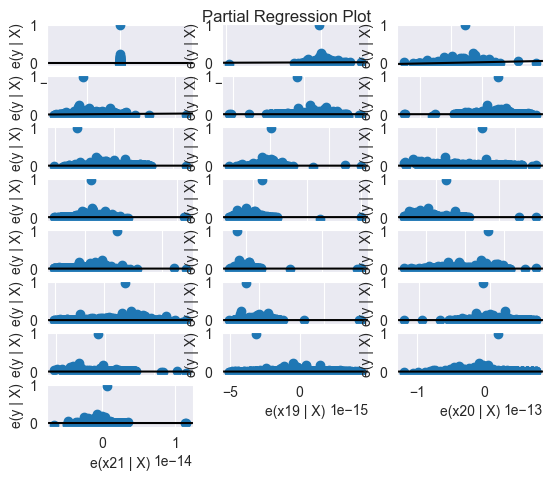

In [22]:
fig = sm.graphics.plot_partregress_grid(model1, grid=(8, 3))

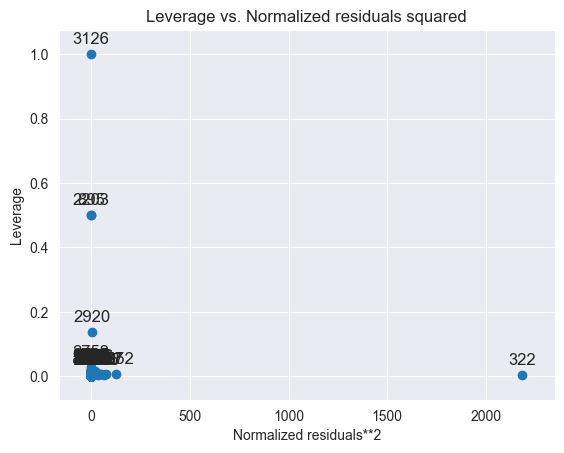

In [23]:
fig = sm.graphics.plot_leverage_resid2(model1)

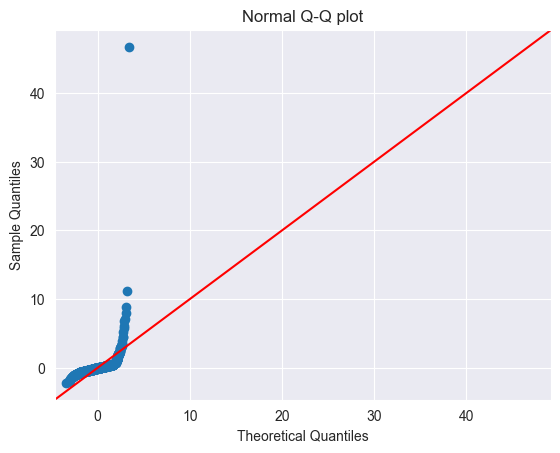

In [24]:
fig = sm.qqplot(model1.resid, stats.norm, fit=True, line="45")
plt.title("Normal Q-Q plot")
plt.show()

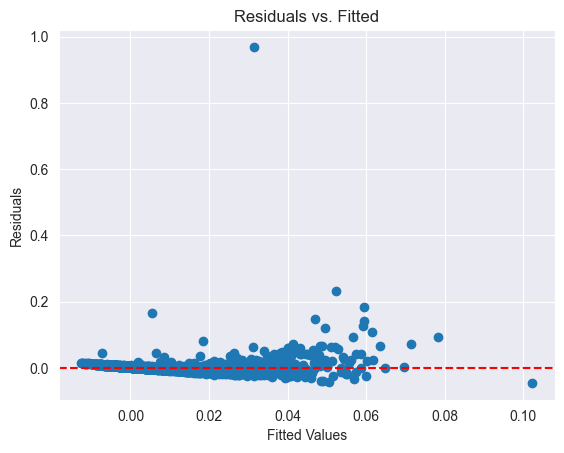

In [25]:
plt.scatter(y_pred_1, model1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

Удалим выброс и проверим новую модель

In [26]:
X_train_2 = np.delete(X_train_1, 322, axis=0).reshape(X_train_1.shape[0] - 1, X_train_1.shape[1])
y_train_2 = np.delete(y_train_1, 322, axis=0).reshape(-1, 1)

In [27]:
model2, y_pred_2 = get_model(X_train_2, y_train_2)

In [28]:
get_model_results(model2, features1, predicted)

Результаты модели линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     208.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:27:15   Log-Likelihood:                 9954.5
No. Observations:                3321   AIC:                        -1.988e+04
Df Residuals:                    3304   BIC:                        -1.977e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

1) R^2 значительно увеличилось в сравнении с первой моделью (0.503)
2) Уравнение значимо в целом, т.к. p-value < 0.05
3) Значение AIC уменьшилось в сравнении с первой моделью (4826)
4) Остатки все еще не имеют нормального распределения, имеют автокорреляцию и мультиколлинеарны

In [29]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(model2.resid, model2.model.exog)
print(list(zip(name, test)))

[('Lagrange multiplier statistic', 197.2386847481855), ('p-value', 1.2645922845448049e-30), ('f-value', 13.038700556805177), ('f p-value', 2.2310022610180853e-34)]


p-value < 0.05 => остатки гетероскедастичны

In [30]:
get_significant_coefficients(model2, features1)

Значимые переменные:
['Constant' 'BHK' 'Size' 'Bathroom' 'City_Bangalore' 'City_Chennai'
 'City_Hyderabad' 'City_Kolkata' 'City_Mumbai'
 'Furnishing Status_Furnished' 'Furnishing Status_Semi-Furnished'
 'Tenant Preferred_Bachelors/Family' 'Tenant Preferred_Family'
 'Point of Contact_Contact Agent' 'Point of Contact_Contact Owner']


In [31]:
get_regression_equation(model2, features1)

Уравнение линейной регрессии:
0.0095 + 0.0011 * BHK + 0.0059 * Size + 0.0032 * Bathroom + 0.0000 * Area Type_Built Area + 0.0002 * Area Type_Carpet Area + -0.0002 * Area Type_Super Area + -0.0011 * City_Bangalore + -0.0015 * City_Chennai + 0.0002 * City_Delhi + -0.0025 * City_Hyderabad + -0.0007 * City_Kolkata + 0.0053 * City_Mumbai + 0.0007 * Furnishing Status_Furnished + -0.0004 * Furnishing Status_Semi-Furnished + -0.0002 * Furnishing Status_Unfurnished + -0.0000 * Tenant Preferred_Bachelors + 0.0005 * Tenant Preferred_Bachelors/Family + -0.0007 * Tenant Preferred_Family + 0.0005 * Point of Contact_Contact Agent + 0.0001 * Point of Contact_Contact Builder + -0.0005 * Point of Contact_Contact Owner


In [32]:
infl = get_influence(model2)
infl

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,dfb_x9,...,dfb_x18,dfb_x19,dfb_x20,dfb_x21,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.004706,-0.004894,-0.006110,0.008469,0.000348,-0.003543,0.003521,0.001114,0.000017,-0.011590,...,0.000267,-0.005670,1.595313e-05,0.005679,0.000022,-0.270183,0.006579,-0.021987,-0.270145,-0.021984
1,0.003187,0.000341,-0.000002,-0.001086,0.000059,-0.000052,0.000048,-0.000389,-0.001446,-0.000442,...,0.008756,0.001570,-1.212244e-04,-0.001566,0.000007,0.183390,0.004498,0.012327,0.183363,0.012325
2,0.014482,-0.006053,-0.006163,-0.000672,-0.001382,-0.005289,0.005403,-0.005425,-0.005955,-0.006706,...,-0.001061,0.006036,-2.461444e-03,-0.005917,0.000089,0.834620,0.002798,0.044208,0.834582,0.044206
3,0.011588,-0.004470,-0.009416,0.003480,0.000027,-0.007370,0.007379,0.020487,-0.005637,-0.005274,...,-0.000798,0.001189,-3.005846e-04,-0.001175,0.000052,0.666827,0.002559,0.033778,0.666771,0.033775
4,-0.003455,-0.001074,0.001650,-0.002657,0.000062,0.002265,-0.002273,0.001989,-0.006152,0.001263,...,0.001524,0.001114,-1.459536e-04,-0.001108,0.000005,-0.198929,0.002716,-0.010382,-0.198900,-0.010380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,-0.003476,-0.000490,0.001089,-0.001674,0.000135,-0.005496,0.005494,0.001496,0.002324,0.000009,...,-0.009674,0.005035,8.648117e-07,-0.005044,0.000011,-0.199853,0.005850,-0.015331,-0.199824,-0.015329
3317,-0.006453,-0.007502,-0.000525,0.002199,-0.000214,0.005996,-0.005989,0.002395,0.004811,0.002649,...,-0.000024,0.000311,-9.049397e-06,-0.000311,0.000027,-0.371351,0.004223,-0.024184,-0.371303,-0.024181
3318,0.004120,-0.001055,-0.003339,0.000567,-0.000143,0.001427,-0.001419,-0.000649,0.010142,-0.001297,...,0.011580,0.007601,-1.480677e-04,-0.007607,0.000016,0.236755,0.006120,0.018578,0.236721,0.018575
3319,-0.016950,0.020742,-0.081560,0.030915,0.000982,-0.018596,0.018548,0.017493,-0.035943,-0.006610,...,0.008309,-0.015703,-3.542323e-04,0.015748,0.000470,-0.968029,0.010916,-0.101694,-0.968020,-0.101693


In [33]:
outliers = get_outliers(model2)
outliers

,Residuals,Standardized Residuals,P-value
80,0.043405,3.593763,3.259361e-04
143,-0.038384,-3.178064,1.482620e-03
156,0.045152,3.738434,1.851701e-04
161,0.035539,2.942562,3.255090e-03
204,0.036406,3.014330,2.575471e-03
...,...,...,...
3094,0.044943,3.721132,1.983318e-04
3138,0.059768,4.948617,7.474281e-07
3214,0.147350,12.200101,0.000000e+00
3252,0.063677,5.272300,1.347243e-07


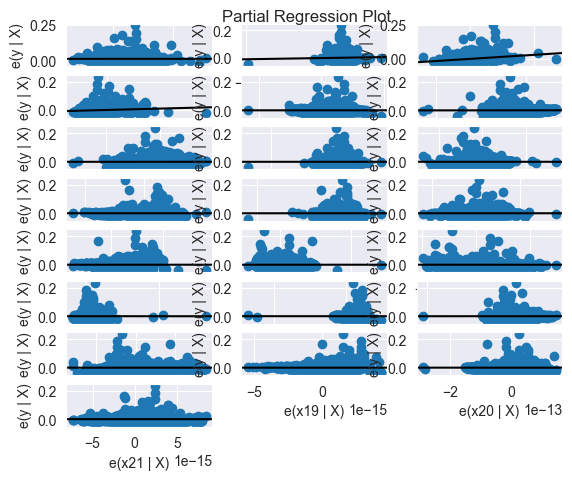

In [34]:
fig = sm.graphics.plot_partregress_grid(model2, grid=(8, 3))

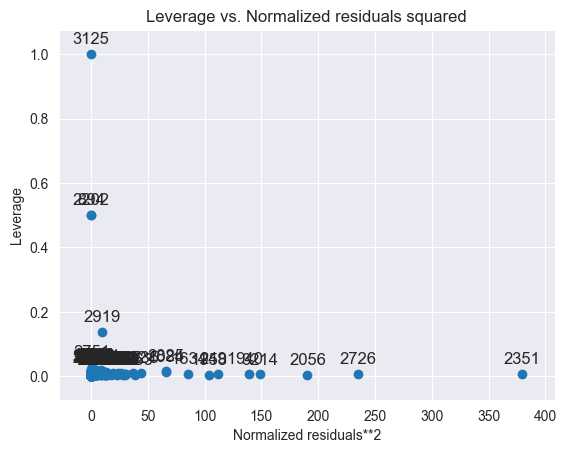

In [35]:
fig = sm.graphics.plot_leverage_resid2(model2)

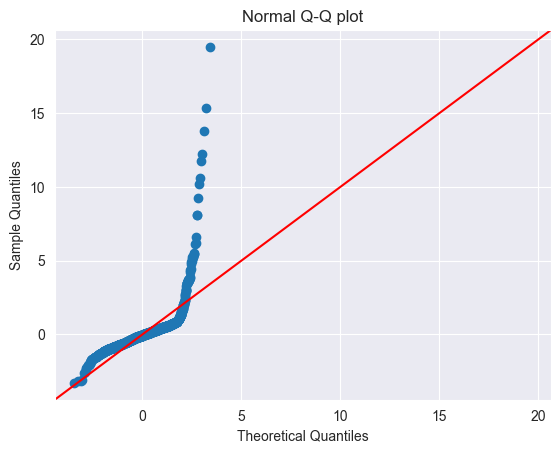

In [36]:
fig = sm.qqplot(model2.resid, stats.norm, fit=True, line="45")
plt.title("Normal Q-Q plot")
plt.show()

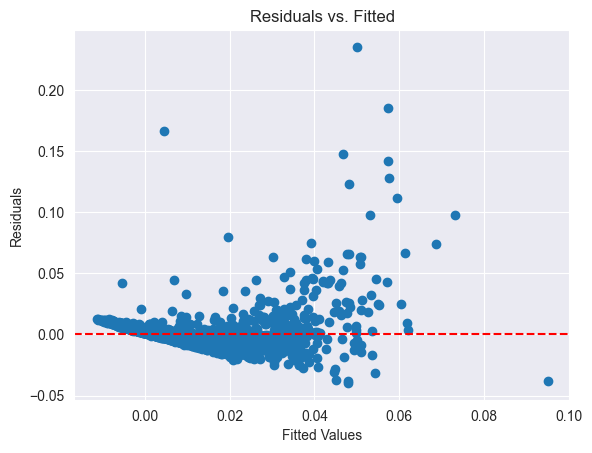

In [37]:
plt.scatter(y_pred_2, model2.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

In [38]:
y_train_boxcox, alpha = stats.boxcox(y_train)
y_train_boxcox = np.delete(y_train_boxcox, 322, axis=0).reshape(-1, 1)
alpha

-0.339672539465588

In [39]:
model_boxcox, y_pred_boxcox = get_model(X_train_2, y_train_boxcox)

In [40]:
get_model_results(model_boxcox, features1, predicted)

Результаты модели линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     654.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:27:54   Log-Likelihood:                 9260.9
No. Observations:                3321   AIC:                        -1.849e+04
Df Residuals:                    3304   BIC:                        -1.838e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

1) R^2 значительно увеличилось в сравнении с остальными моделями (0.76)
2) Уравнение значимо в целом, т.к. p-value < 0.05
3) Значение AIC сильно уменьшилось
4) Остатки все еще не имеют нормального распределения, не имеют автокорреляции (?) и мультиколлинеарны

In [41]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(model_boxcox.resid, model_boxcox.model.exog)
print(list(zip(name, test)))

[('Lagrange multiplier statistic', 55.456700595461115), ('p-value', 6.062951063502681e-05), ('f-value', 3.5068616836441646), ('f p-value', 2.669716506531241e-06)]


p-value < 0.05 => остатки гетероскедастичны

In [42]:
get_significant_coefficients(model_boxcox, features1)

Значимые переменные:
['Constant' 'BHK' 'Size' 'Bathroom' 'Area Type_Carpet Area'
 'Area Type_Super Area' 'City_Bangalore' 'City_Chennai' 'City_Hyderabad'
 'City_Kolkata' 'City_Mumbai' 'Furnishing Status_Furnished'
 'Furnishing Status_Semi-Furnished' 'Furnishing Status_Unfurnished'
 'Tenant Preferred_Bachelors' 'Tenant Preferred_Bachelors/Family'
 'Tenant Preferred_Family' 'Point of Contact_Contact Agent'
 'Point of Contact_Contact Owner']


In [43]:
get_regression_equation(model_boxcox, features1)

Уравнение линейной регрессии:
2.8365 + 0.0077 * BHK + 0.0071 * Size + 0.0035 * Bathroom + -0.0001 * Area Type_Built Area + 0.0004 * Area Type_Carpet Area + -0.0003 * Area Type_Super Area + -0.0015 * City_Bangalore + -0.0019 * City_Chennai + 0.0002 * City_Delhi + -0.0031 * City_Hyderabad + -0.0055 * City_Kolkata + 0.0104 * City_Mumbai + 0.0020 * Furnishing Status_Furnished + 0.0006 * Furnishing Status_Semi-Furnished + -0.0020 * Furnishing Status_Unfurnished + 0.0009 * Tenant Preferred_Bachelors + -0.0003 * Tenant Preferred_Bachelors/Family + -0.0006 * Tenant Preferred_Family + 0.0027 * Point of Contact_Contact Agent + -0.0003 * Point of Contact_Contact Builder + -0.0026 * Point of Contact_Contact Owner


In [44]:
infl = get_influence(model_boxcox)
infl

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,dfb_x9,...,dfb_x18,dfb_x19,dfb_x20,dfb_x21,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.011101,0.011544,0.014412,-0.019978,-0.000820,0.008357,-0.008307,-0.002627,-0.000041,0.027338,...,-0.000630,0.013376,-0.000038,-0.013397,1.222526e-04,0.637288,0.006579,0.051861,0.637231,0.051856
1,0.020883,0.002233,-0.000016,-0.007120,0.000386,-0.000342,0.000312,-0.002549,-0.009476,-0.002897,...,0.057383,0.010288,-0.000794,-0.010264,2.964909e-04,1.201567,0.004498,0.080764,1.201647,0.080769
2,-0.008539,0.003569,0.003634,0.000396,0.000815,0.003118,-0.003186,0.003199,0.003511,0.003954,...,0.000626,-0.003559,0.001451,0.003488,3.088523e-05,-0.492123,0.002798,-0.026067,-0.492066,-0.026064
3,-0.009243,0.003566,0.007511,-0.002776,-0.000022,0.005879,-0.005886,-0.016342,0.004497,0.004207,...,0.000636,-0.000948,0.000240,0.000937,3.300019e-05,-0.531928,0.002559,-0.026944,-0.531871,-0.026942
4,0.021430,0.006663,-0.010237,0.016485,-0.000387,-0.014050,0.014101,-0.012339,0.038159,-0.007833,...,-0.009453,-0.006911,0.000905,0.006875,1.884367e-04,1.233702,0.002716,0.064386,1.233800,0.064391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,0.007612,0.001074,-0.002385,0.003666,-0.000297,0.012036,-0.012032,-0.003277,-0.005090,-0.000021,...,0.021186,-0.011028,-0.000002,0.011047,5.123717e-05,0.437673,0.005850,0.033574,0.437620,0.033570
3317,0.024917,0.028970,0.002026,-0.008491,0.000826,-0.023156,0.023127,-0.009249,-0.018576,-0.010228,...,0.000093,-0.001201,0.000035,0.001201,3.962125e-04,1.433598,0.004223,0.093363,1.433827,0.093378
3318,0.006463,-0.001655,-0.005239,0.000889,-0.000224,0.002239,-0.002226,-0.001018,0.015910,-0.002034,...,0.018166,0.011924,-0.000232,-0.011933,3.860697e-05,0.371401,0.006120,0.029144,0.371353,0.029140
3319,0.000390,-0.000477,0.001876,-0.000711,-0.000023,0.000428,-0.000427,-0.000402,0.000827,0.000152,...,-0.000191,0.000361,0.000008,-0.000362,2.488252e-07,0.022272,0.010916,0.002340,0.022268,0.002339


In [45]:
outliers = get_outliers(model_boxcox)
outliers

,Residuals,Standardized Residuals,P-value
24,0.032309,2.170826,0.029944
28,-0.039596,-2.660474,0.007803
41,-0.059186,-3.976742,0.000070
65,-0.034295,-2.304314,0.021205
116,-0.043869,-2.947596,0.003203
...,...,...,...
3242,-0.033233,-2.232953,0.025552
3257,-0.033531,-2.252945,0.024263
3258,-0.040735,-2.737028,0.006200
3303,0.042946,2.885541,0.003907


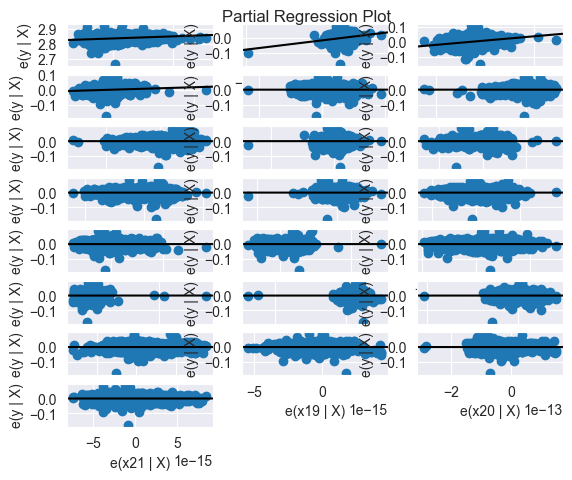

In [46]:
fig = sm.graphics.plot_partregress_grid(model_boxcox, grid=(8, 3))

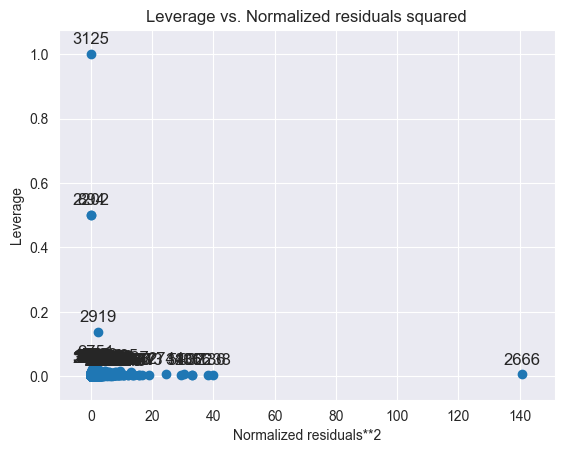

In [47]:
fig = sm.graphics.plot_leverage_resid2(model_boxcox)

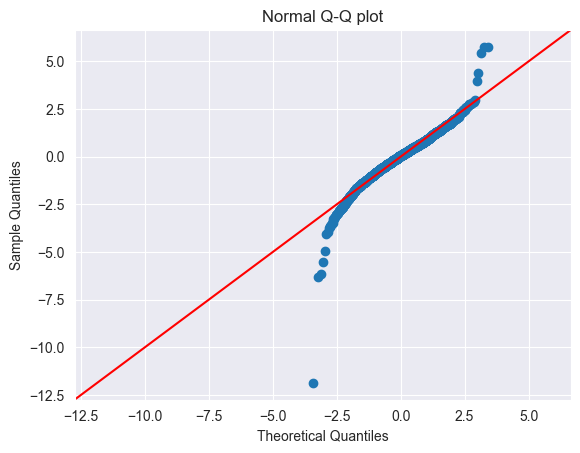

In [48]:
fig = sm.qqplot(model_boxcox.resid, stats.norm, fit=True, line="45")
plt.title("Normal Q-Q plot")
plt.show()

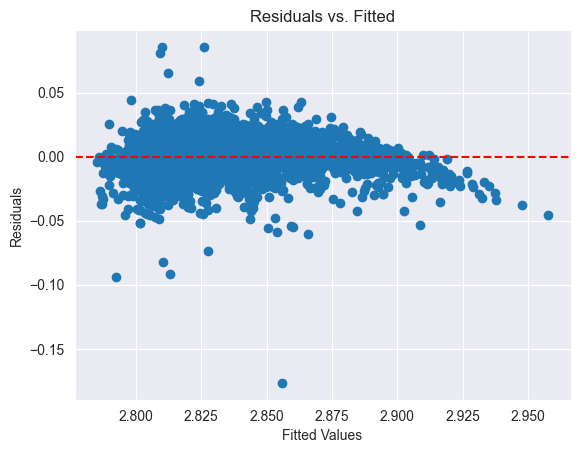

In [49]:
plt.scatter(y_pred_boxcox, model_boxcox.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

In [50]:
def backward_selection(X, y, features, threshold=0.05, verbose=True):
    included = features.copy()
    best_model = sm.OLS(y, sm.add_constant(X)).fit()
    best_aic = best_model.aic
    changed = True

    while changed:
        changed = False
        worst_aic = best_aic
        feature_to_remove = None

        for feature in included:
            subset = included.copy()
            subset.remove(feature)
            new_X = X[:, [features.index(f) for f in subset]]
            model = sm.OLS(y, sm.add_constant(new_X)).fit()
            aic = model.aic

            if aic < worst_aic:
                worst_aic = aic
                feature_to_remove = feature

        if feature_to_remove is not None:
            included.remove(feature_to_remove)
            best_aic = worst_aic
            best_model = sm.OLS(y, sm.add_constant(X[:, [features.index(f) for f in included]])).fit()
            changed = True

            if verbose:
                print(f'Removed feature: {feature_to_remove}, AIC: {best_aic:.5f}')

    return best_model, included, best_model.predict()

In [51]:
best_model, best_features, y_pred_best = backward_selection(X_train_2, y_train_boxcox, features1)

Removed feature: Furnishing Status_Unfurnished, AIC: -18487.82568


In [52]:
get_model_results(best_model, best_features, predicted)

Результаты модели линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     654.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:28:32   Log-Likelihood:                 9260.9
No. Observations:                3321   AIC:                        -1.849e+04
Df Residuals:                    3304   BIC:                        -1.838e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

1) R^2 не изменилось после удаления признаков
2) Уравнение значимо в целом, т.к. p-value < 0.05
3) Значение AIC немного уменьшилось
4) Остатки все еще не имеют нормального распределения, имеют автокорреляцию и мультиколлинеарны

In [53]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(best_model.resid, best_model.model.exog)
print(list(zip(name, test)))

[('Lagrange multiplier statistic', 55.456700595461484), ('p-value', 3.508061112711167e-05), ('f-value', 3.50686168364419), ('f p-value', 2.6697165065308614e-06)]


p-value < 0.05 => остатки гетероскедастичны

In [54]:
get_significant_coefficients(best_model, best_features)

Значимые переменные:
['Constant' 'BHK' 'Size' 'Bathroom' 'Area Type_Carpet Area'
 'Area Type_Super Area' 'City_Bangalore' 'City_Chennai' 'City_Hyderabad'
 'City_Kolkata' 'City_Mumbai' 'Furnishing Status_Furnished'
 'Furnishing Status_Semi-Furnished' 'Furnishing Status_Unfurnished'
 'Tenant Preferred_Bachelors' 'Tenant Preferred_Bachelors/Family'
 'Tenant Preferred_Family' 'Point of Contact_Contact Builder']


In [55]:
get_regression_equation(best_model, best_features)

Уравнение линейной регрессии:
2.8365 + 0.0077 * BHK + 0.0071 * Size + 0.0035 * Bathroom + -0.0001 * Area Type_Built Area + 0.0004 * Area Type_Carpet Area + -0.0003 * Area Type_Super Area + -0.0015 * City_Bangalore + -0.0019 * City_Chennai + 0.0002 * City_Delhi + -0.0031 * City_Hyderabad + -0.0055 * City_Kolkata + 0.0104 * City_Mumbai + 0.0034 * Furnishing Status_Furnished + 0.0026 * Furnishing Status_Semi-Furnished + 0.0009 * Tenant Preferred_Bachelors + -0.0003 * Tenant Preferred_Bachelors/Family + -0.0006 * Tenant Preferred_Family + 0.0027 * Point of Contact_Contact Agent + -0.0003 * Point of Contact_Contact Builder + -0.0026 * Point of Contact_Contact Owner


In [56]:
infl = get_influence(best_model)
infl

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,dfb_x9,...,dfb_x17,dfb_x18,dfb_x19,dfb_x20,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.011101,0.011544,0.014412,-0.019978,-0.000820,0.008357,-0.008307,-0.002627,-0.000041,0.027338,...,-0.000630,0.013376,-0.000038,-0.013397,1.280741e-04,0.637288,0.006579,0.051861,0.637231,0.051856
1,0.020883,0.002233,-0.000016,-0.007120,0.000386,-0.000342,0.000312,-0.002549,-0.009476,-0.002897,...,0.057383,0.010288,-0.000794,-0.010264,3.106095e-04,1.201567,0.004498,0.080764,1.201647,0.080769
2,-0.008539,0.003569,0.003634,0.000396,0.000815,0.003118,-0.003186,0.003199,0.003511,0.003954,...,0.000626,-0.003559,0.001451,0.003488,3.235596e-05,-0.492123,0.002798,-0.026067,-0.492066,-0.026064
3,-0.009243,0.003566,0.007511,-0.002776,-0.000022,0.005879,-0.005886,-0.016342,0.004497,0.004207,...,0.000636,-0.000948,0.000240,0.000937,3.457163e-05,-0.531928,0.002559,-0.026944,-0.531871,-0.026942
4,0.021430,0.006663,-0.010237,0.016485,-0.000387,-0.014050,0.014101,-0.012339,0.038159,-0.007833,...,-0.009453,-0.006911,0.000905,0.006875,1.974099e-04,1.233702,0.002716,0.064386,1.233800,0.064391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,0.007612,0.001074,-0.002385,0.003666,-0.000297,0.012036,-0.012032,-0.003277,-0.005090,-0.000021,...,0.021186,-0.011028,-0.000002,0.011047,5.367703e-05,0.437673,0.005850,0.033574,0.437620,0.033570
3317,0.024917,0.028970,0.002026,-0.008491,0.000826,-0.023156,0.023127,-0.009249,-0.018576,-0.010228,...,0.000093,-0.001201,0.000035,0.001201,4.150798e-04,1.433598,0.004223,0.093363,1.433827,0.093378
3318,0.006463,-0.001655,-0.005239,0.000889,-0.000224,0.002239,-0.002226,-0.001018,0.015910,-0.002034,...,0.018166,0.011924,-0.000232,-0.011933,4.044540e-05,0.371401,0.006120,0.029144,0.371353,0.029140
3319,0.000390,-0.000477,0.001876,-0.000711,-0.000023,0.000428,-0.000427,-0.000402,0.000827,0.000152,...,-0.000191,0.000361,0.000008,-0.000362,2.606741e-07,0.022272,0.010916,0.002340,0.022268,0.002339


In [57]:
outliers = get_outliers(best_model)
outliers

,Residuals,Standardized Residuals,P-value
24,0.032309,2.170826,0.029944
28,-0.039596,-2.660474,0.007803
41,-0.059186,-3.976742,0.000070
65,-0.034295,-2.304314,0.021205
116,-0.043869,-2.947596,0.003203
...,...,...,...
3242,-0.033233,-2.232953,0.025552
3257,-0.033531,-2.252945,0.024263
3258,-0.040735,-2.737028,0.006200
3303,0.042946,2.885541,0.003907


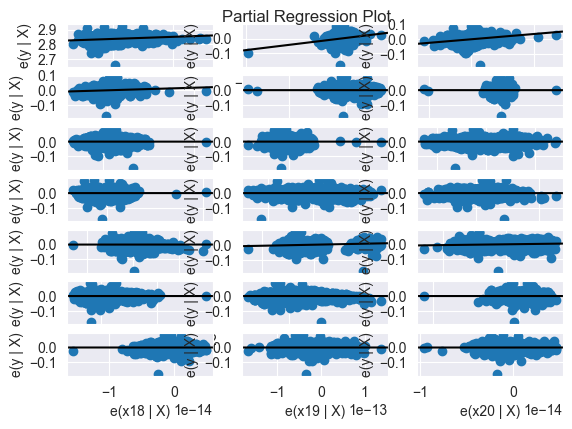

In [58]:
fig = sm.graphics.plot_partregress_grid(best_model, grid=(8, 3))

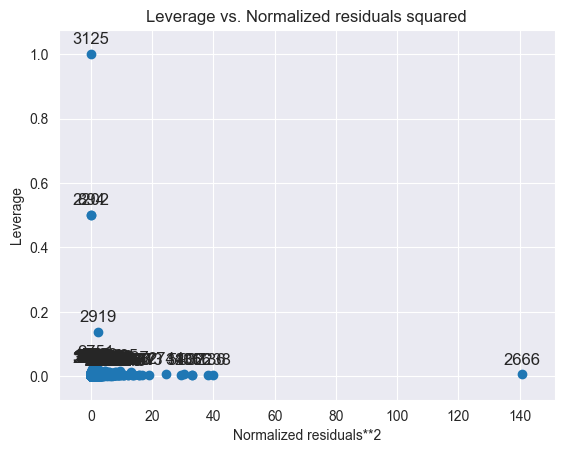

In [59]:
fig = sm.graphics.plot_leverage_resid2(best_model)

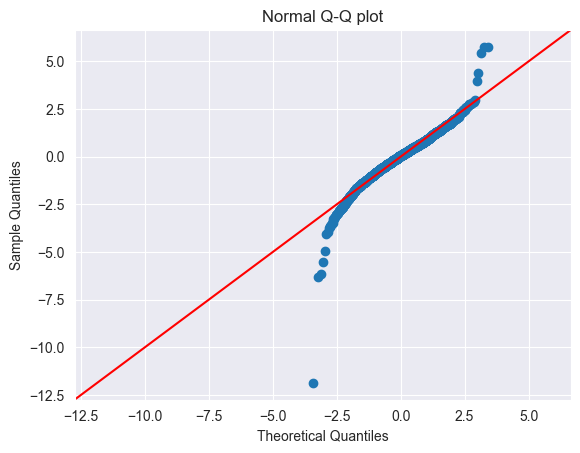

In [60]:
fig = sm.qqplot(model_boxcox.resid, stats.norm, fit=True, line="45")
plt.title("Normal Q-Q plot")
plt.show()

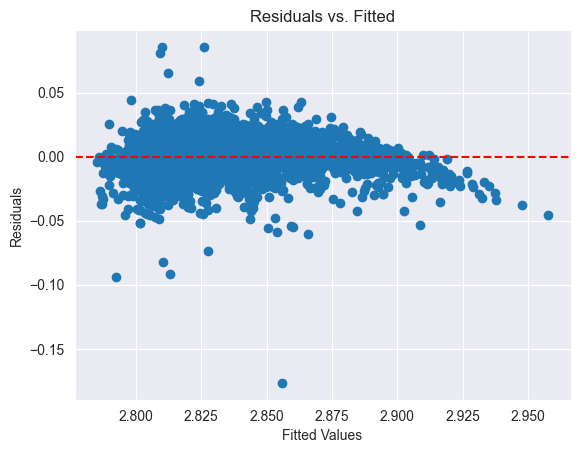

In [61]:
plt.scatter(y_pred_best, best_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()